In [1]:
import numpy as np

In [20]:
diff = np.load('erk1_1kcontacts_wt_minus_mut.npy')

In [21]:
diff.shape

(1000,)

In [22]:
import matplotlib.pyplot as plt

Text(0,0.5,'WT - mutant contact difference')

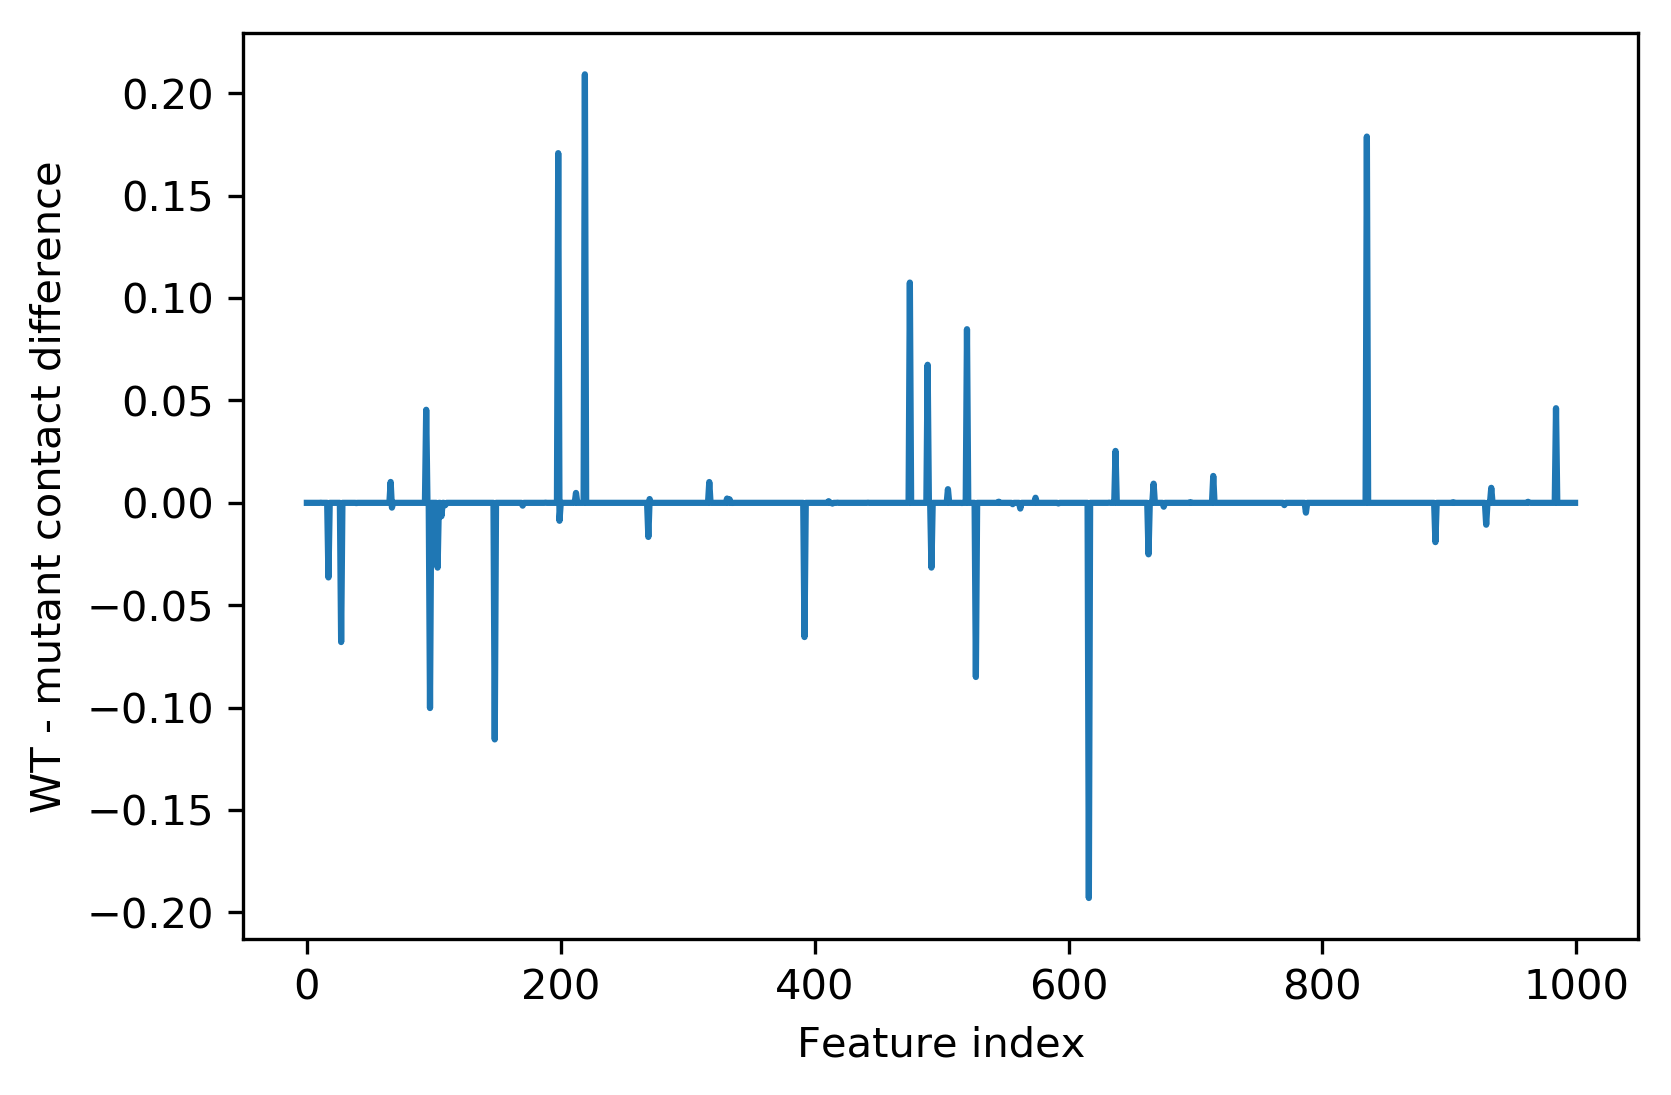

In [37]:
plt.figure(dpi=300)
plt.plot(diff)
plt.xlabel('Feature index')
plt.ylabel('WT - mutant contact difference')

In [24]:
# let's take top10 of np.abs

In [25]:
dists = np.load('erk1_1000dist.npy')

In [26]:
dists[np.argsort(np.abs(diff))[::-1][:10]]

array([[165, 168],
       [ 29,  49],
       [304, 307],
       [140, 163],
       [185, 220],
       [ 24, 149],
       [ 77,  98],
       [166, 322],
       [269, 272],
       [ 70, 319]])

In [30]:
diff[np.argsort(np.abs(diff))[::-1][:10]]

array([ 0.20927962, -0.19298902,  0.17888679,  0.17079277, -0.11553625,
        0.1075832 , -0.10021924, -0.08504348,  0.08480382, -0.06798442])

In [15]:
# ok let's look at those in Pymol

In [16]:
# in Pymol we have to add 24 to the indexes

In [31]:
x = dists[np.argsort(np.abs(diff))[::-1][:10]]

In [32]:
x_ = []

for contact in x:
    x_.append([contact[0]+24, contact[1]+24])

In [33]:
x_

[[189, 192],
 [53, 73],
 [328, 331],
 [164, 187],
 [209, 244],
 [48, 173],
 [101, 122],
 [190, 346],
 [293, 296],
 [94, 343]]

In [34]:
# ok so these are looking good - let's do tica and clustering into 100 states on these 10 distances, see timescales

In [38]:
np.argsort(np.abs(diff))[::-1][:10]

array([219, 616, 835, 198, 148, 475,  97, 527, 520,  27])

In [39]:
#########

In [48]:
dtrajs = np.load('erk1_wt_10topdist_dtrajs.npy')
dtrajs = [np.concatenate(x) for x in dtrajs]

In [42]:
import pyemma

In [44]:
its = pyemma.msm.its(dtrajs)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

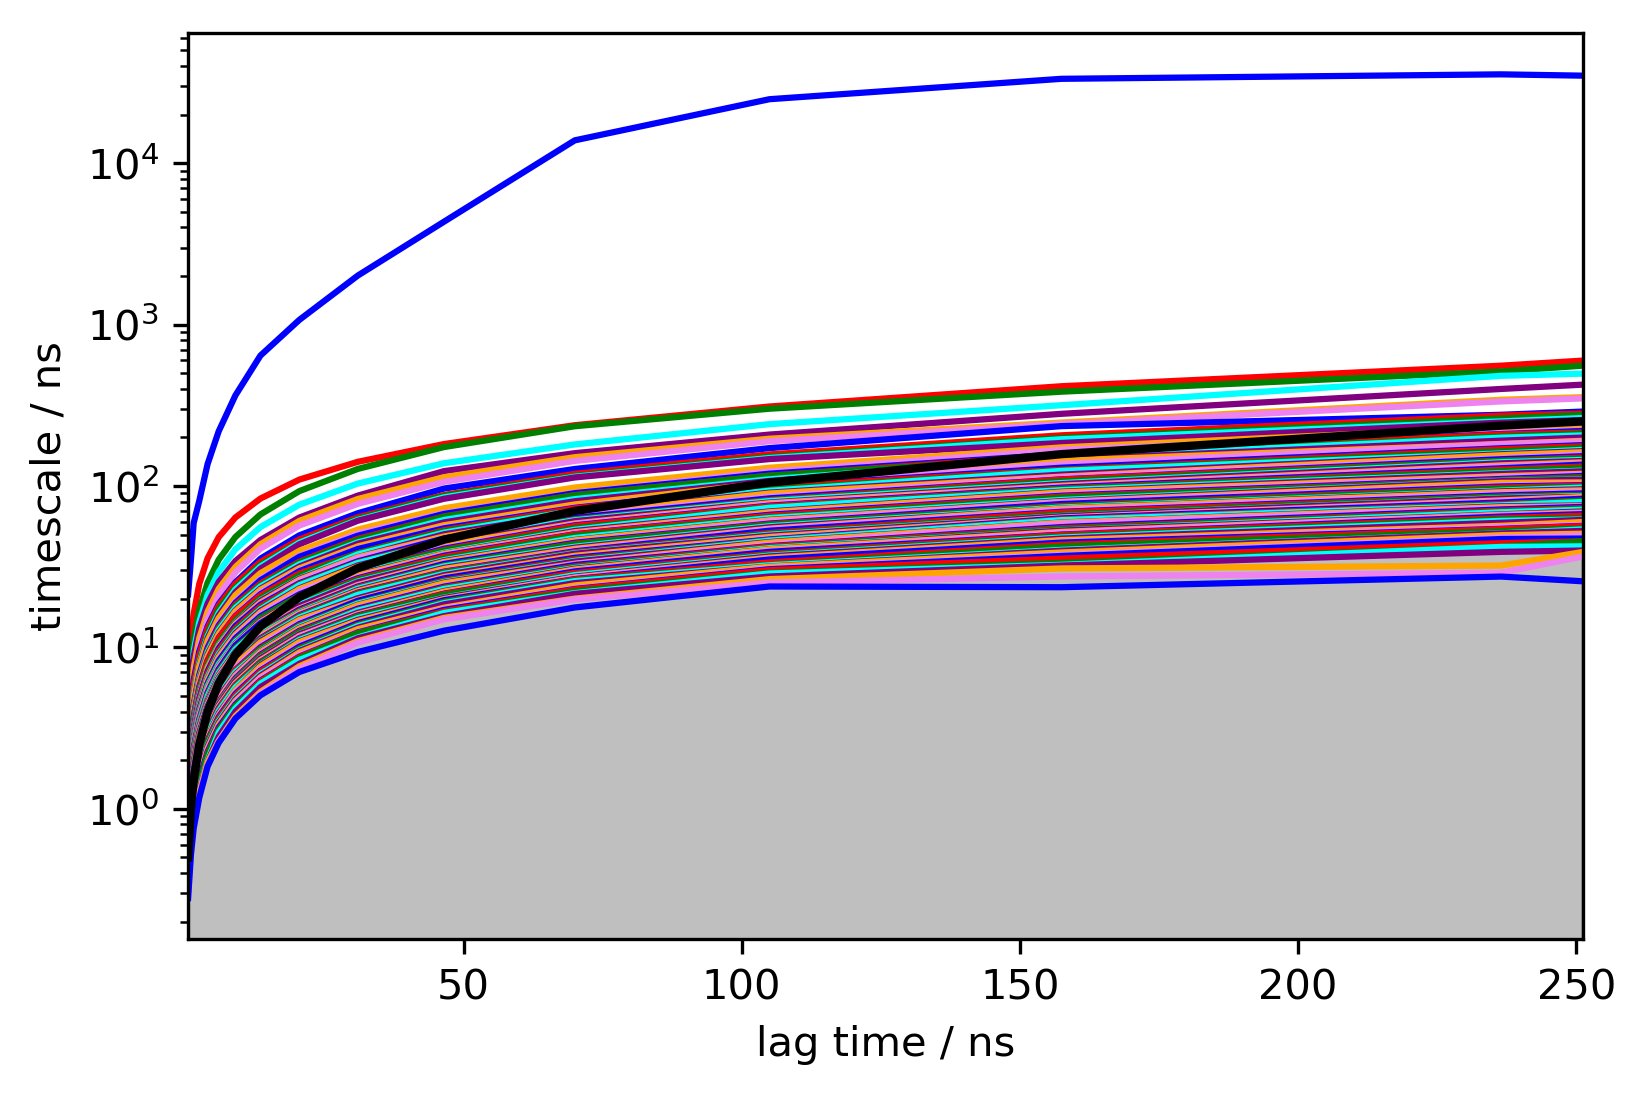

In [47]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.5)

In [49]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=200)

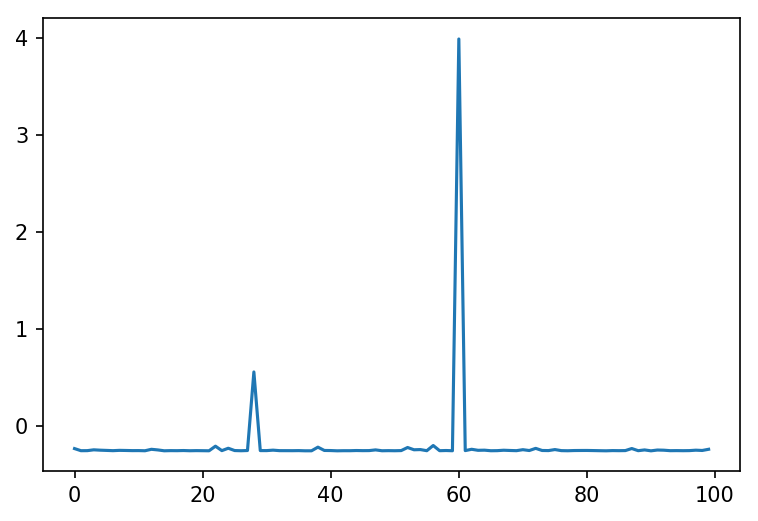

In [61]:
plt.figure(dpi=150)
plt.plot(msm.eigenvectors_right(2)[:,1])

In [66]:
np.argsort(msm.eigenvectors_right(2)[:,1])[::-1]

array([60, 28, 56, 22, 38, 52, 24, 72, 87,  0, 99, 62, 12, 75, 54, 70, 53,
        3, 47, 89, 13, 91, 31, 64,  4, 97, 92, 67, 63,  7,  5, 39, 80, 98,
        8, 68, 79, 73, 58, 44, 27, 17, 71, 78, 25, 40, 81, 86, 84, 51, 74,
       29, 61, 10, 46, 35, 30, 94, 96,  9, 19, 15, 76, 23,  2, 45, 49, 32,
       66, 33,  6, 69, 85, 16, 93, 34, 88, 95,  1, 57, 20, 42, 55, 82, 43,
       50, 65, 26, 59, 18, 77, 11, 48, 14, 21, 37, 36, 83, 41, 90])

In [72]:
len(msm.eigenvectors_right(2)[:,1])

100

In [73]:
# let's see the contact fractions for our 10 contacts for each state

In [91]:
dist = np.load('erk1_wt_10topdist.npy')

In [92]:
dist = (np.concatenate(dist)<0.4).astype('int')

In [93]:
dist.shape

(1004976, 10)

In [89]:
dtrajs_concat = np.concatenate(dtrajs)

In [90]:
dtrajs_concat.shape

(1004976,)

In [97]:
np.mean([dist[0], dist[1]], axis=0)

array([ 1. ,  0.5,  1. ,  1. ,  0. ,  0. ,  1. ,  1. ,  0.5,  0. ])

In [114]:
state_means = []

for state in range(100):
    state_means.append(np.mean(dist[np.argwhere(dtrajs_concat == state)], axis=0))

In [115]:
state_means = np.concatenate(state_means)

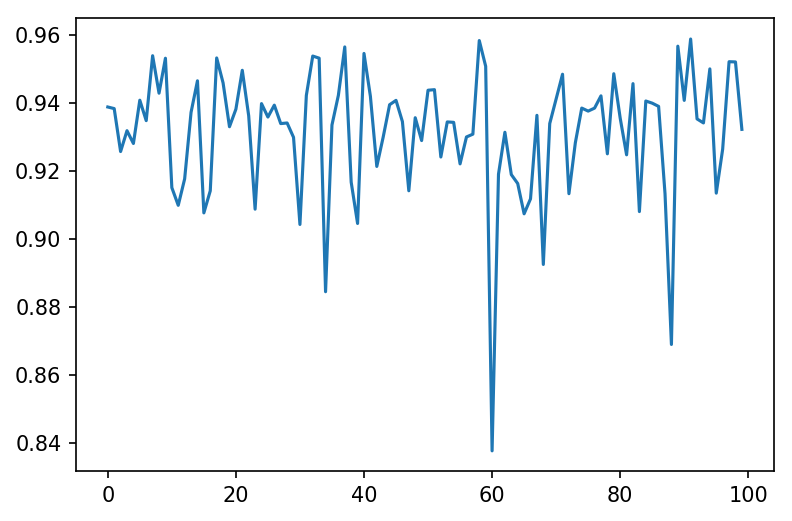

In [123]:
plt.figure(dpi=150)
plt.plot(state_means[:,2])

In [122]:
state_means[60,2] # contact 2 important for state 60 - one of the two in eigenvector

0.83773216031280551

In [134]:
# that's the only interesting thing

In [135]:
# let's try a random forest, to classify between the two macrostates
# let's do an HMM, not just rely on the eigenvector, to be sure

In [137]:
hmm = pyemma.msm.estimate_hidden_markov_model(dtrajs, lag=200, connectivity='largest', nstates=2)

In [ ]:
hmm.metastable_sets

In [138]:
# hmm.metastable_sets
# hmm.metastable_sets
# hmm.pi
# np.save('erk1_wt_hmm_pi', hmm.pi)
# np.save('erk1_wt_hmm_P', hmm.P)
# np.save('erk1_wt_hmm_meta_membs', hmm.metastable_memberships)

[array([ 0,  1,  2,  3,  4,  5,  6, 10, 11, 12, 13, 15, 16, 19, 20, 22, 23,
        24, 25, 27, 28, 29, 30, 31, 34, 35, 38, 39, 42, 43, 46, 47, 49, 52,
        54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 69, 70, 72, 73, 74, 75,
        76, 78, 80, 81, 83, 84, 85, 86, 88, 91, 92, 93, 95, 96, 97, 99]),
 array([ 7,  8,  9, 14, 17, 18, 21, 26, 32, 33, 36, 37, 40, 41, 44, 45, 48,
        50, 51, 53, 58, 59, 67, 68, 71, 77, 79, 82, 87, 89, 90, 94, 98])]

In [145]:
meta_sets = hmm.metastable_sets

In [139]:
np.save('erk1_wt_2meta_sets', hmm.metastable_sets)

In [141]:
hmm.pi

array([ 0.97594656,  0.02405344])

In [140]:
np.save('erk1_wt_hmm_pi', hmm.pi)

In [142]:
np.save('erk1_wt_hmm_P', hmm.P)

In [143]:
np.save('erk1_wt_hmm_meta_membs', hmm.metastable_memberships)

In [144]:
# let's see a random forest trying to classify into the two macrostates

In [147]:
dtrajs_concat_macro = []

for state in dtrajs_concat:
    if state in meta_sets[0]:
        dtrajs_concat_macro.append(0)
    else:
        dtrajs_concat_macro.append(1)

In [155]:
import sklearn

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
clf = RandomForestClassifier(n_estimators=100)

In [160]:
len(dtrajs_concat_macro)

1004976

In [161]:
clf.fit(dist[::100], dtrajs_concat_macro[::100])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [162]:
clf.feature_importances_

array([ 0.01752172,  0.05999677,  0.01334771,  0.01506415,  0.01401036,
        0.78771234,  0.04387162,  0.01549663,  0.01546083,  0.01751787])

In [165]:
clf.predict([dist[0]])

array([1])

In [231]:
dist[0]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [163]:
# ok so this is cool - the contact is [I48, L173]

In [167]:
# ok so the contact is broken in the 2% state - let's assign the mutant to the wt tica and kmeans centers

In [168]:
# ok we're going to repeat all the stuff from above - had to REDO KMEANS because hadn't saved the
# cluster centers, and needed to assign mut data to wt

In [173]:
dtrajs0 = [np.concatenate(x) for x in np.load('erk1_dtrajs_wt_transthru_wt.npy')]
dtrajs1 = [np.concatenate(x) for x in np.load('erk1_dtrajs_mut_transthru_wt.npy')]

In [174]:
its0 = pyemma.msm.its(dtrajs0)
its1 = pyemma.msm.its(dtrajs1)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

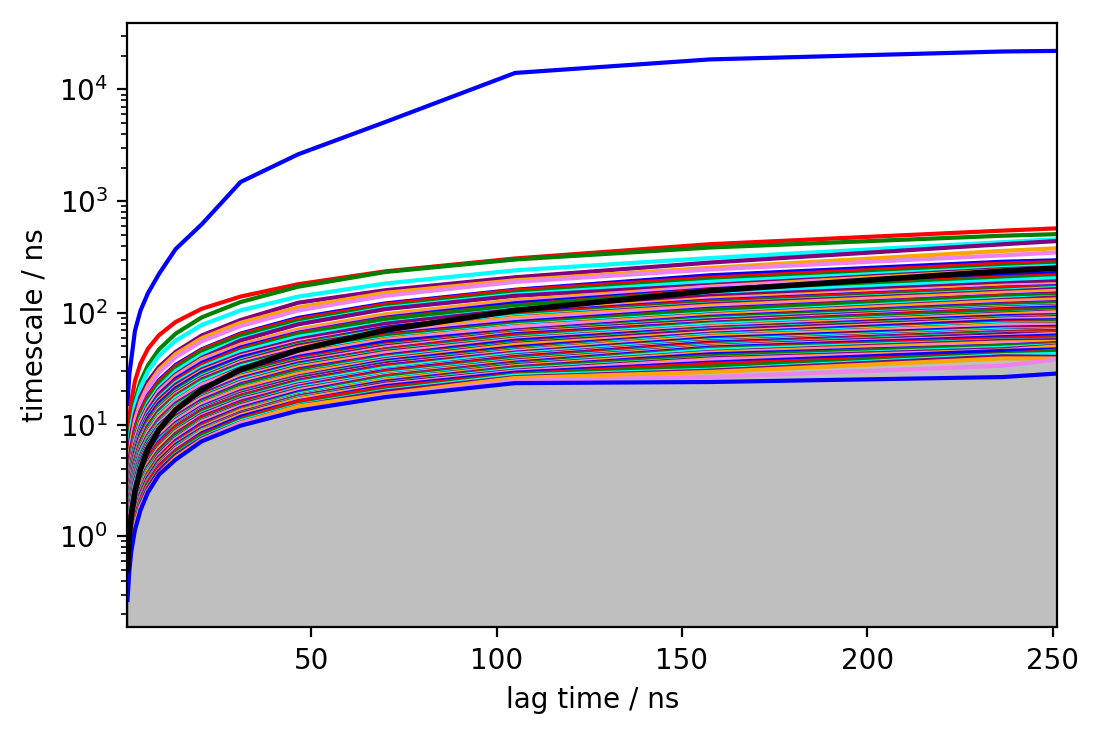

In [178]:
plt.figure(dpi=200)
pyemma.plots.plot_implied_timescales(its0, units='ns', dt=0.5)

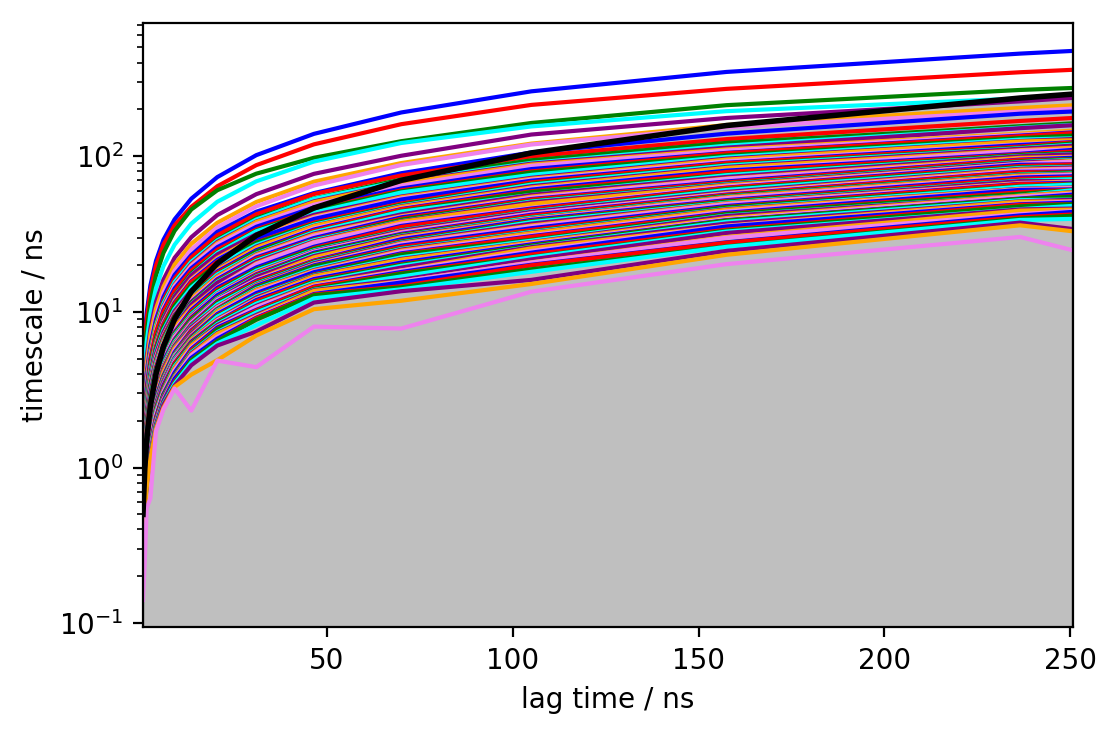

In [179]:
plt.figure(dpi=200)
pyemma.plots.plot_implied_timescales(its1, units='ns', dt=0.5)

In [180]:
msm0 = pyemma.msm.estimate_markov_model(dtrajs0, lag=200)
msm1 = pyemma.msm.estimate_markov_model(dtrajs1, lag=200)

In [182]:
msm0.pi.shape

(100,)

In [183]:
msm1.pi.shape

(99,)

In [185]:
set(msm0.active_set) - set(msm1.active_set)

{22}

In [189]:
pi0 = np.concatenate([msm0.pi[:22], msm0.pi[23:]])

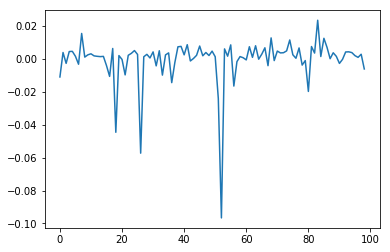

In [192]:
plt.plot(pi0-msm1.pi)

In [193]:
# ok so there's potential for macrostate population changes - let's see

In [194]:
hmm = pyemma.msm.estimate_hidden_markov_model(dtrajs0, lag=200, connectivity='largest', nstates=2)

In [195]:
np.save('erk1_wt_transthruwt_hmm_pi', hmm.pi)
np.save('erk1_wt_transthruwt_hmm_P', hmm.P)
np.save('erk1_wt_transthruwt_hmm_meta_membs', hmm.metastable_memberships)

In [196]:
hmm.metastable_sets

[array([ 0,  1,  2,  4,  6,  7, 10, 11, 13, 15, 16, 17, 18, 20, 21, 22, 25,
        27, 29, 31, 33, 34, 37, 39, 40, 42, 48, 50, 51, 52, 53, 54, 56, 57,
        58, 62, 64, 66, 67, 68, 69, 70, 71, 72, 73, 75, 78, 79, 80, 81, 82,
        84, 86, 87, 88, 89, 91, 92, 94, 95, 96, 97, 98, 99]),
 array([ 3,  5,  8,  9, 12, 14, 19, 23, 24, 26, 28, 30, 32, 35, 36, 38, 41,
        43, 44, 45, 46, 47, 49, 55, 59, 60, 61, 63, 65, 74, 76, 77, 83, 85,
        90, 93])]

In [197]:
hmm.pi

array([ 0.97645158,  0.02354842])

In [198]:
# let's calculate the populations by sum of microstate populations weighted by metastable memberships

In [199]:
meta_membs = hmm.metastable_memberships

In [202]:
meta_membs.shape

(100, 2)

In [207]:
np.sum(meta_membs[:,0] * msm0.pi)

0.92642896422993481

In [208]:
np.sum(meta_membs[:,1] * msm0.pi)

0.073571035770065213

In [209]:
meta_membs1 = np.concatenate([meta_membs[:22], meta_membs[23:]])

In [210]:
np.sum(meta_membs1[:,0] * msm1.pi)

0.95757737880764326

In [211]:
np.sum(meta_membs1[:,1] * msm1.pi)

0.042422621192356916

In [ ]:
# ok so mutant would have less of the inactive state?

In [212]:
# let's draw 100 frames each from the macrostates

In [213]:
# no that might not make sense, because it's only 2 states - let's instead find trajectories that have a transition
# between the two states

In [214]:
meta_sets = hmm.metastable_sets

In [224]:
dtrajs0_macro = []

for traj in dtrajs0:
    dtrajs0_macro.append([])
    for state in traj:
        if state in meta_sets[0]:
            dtrajs0_macro[-1].append(0)
        else:
            dtrajs0_macro[-1].append(1)

In [227]:
len(dtrajs0_macro)

1000

In [228]:
count = 0

for traj in dtrajs0_macro:
    if len(set(traj)) == 2:
        count += 1

In [229]:
count

942

In [230]:
# so how often does that contact change?

In [232]:
dist.shape

(1004976, 10)

In [233]:
dist = np.load('erk1_wt_10topdist.npy')

In [234]:
dist.shape

(1000,)

In [237]:
dist_ = []

for traj in dist:
    dist_.append((traj<0.4).astype('int'))

In [243]:
count = 0

for traj in dist_:
    if len(set(traj[:,5])) == 2:
        count += 1

In [244]:
count

988

In [245]:
# well this can't be important then can it... unsure how to proceed

In [246]:
# let's see what pcca does on that msm

In [248]:
pcca0 = msm0.pcca(2)

In [250]:
pcca0.coarse_grained_stationary_probability

array([ 0.04335134,  0.95664866])

In [251]:
pcca0.metastable_sets

[array([22]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])]

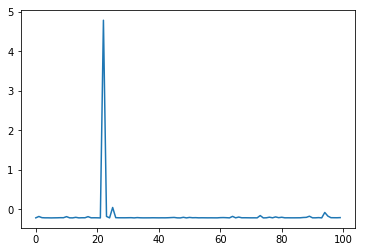

In [254]:
plt.plot(msm0.eigenvectors_right(2)[:,1])

In [255]:
# ok interesting - so let's see what's different about that state again

In [270]:
state_means = []

for state in range(100):
    state_means.append(np.mean(np.concatenate(dist_)[np.argwhere(np.concatenate(dtrajs0) == state)], axis=0))

In [273]:
state_means = np.concatenate(state_means)

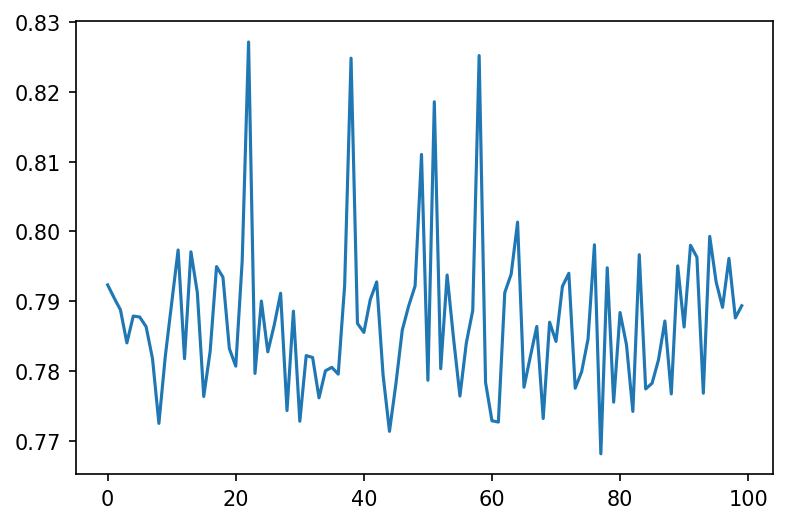

In [313]:
plt.figure(dpi=150)
plt.plot(state_means[:,8])

In [314]:
state_means[:,8][22]

0.82713915298184959

In [291]:
# let's find trajectories where we get into or out of state 22

In [293]:
trajs22 = []

for i in range(len(dtrajs0)):
    if 22 in dtrajs0[i]:
        trajs22.append(i)

In [294]:
trajs22

[704, 807, 876]

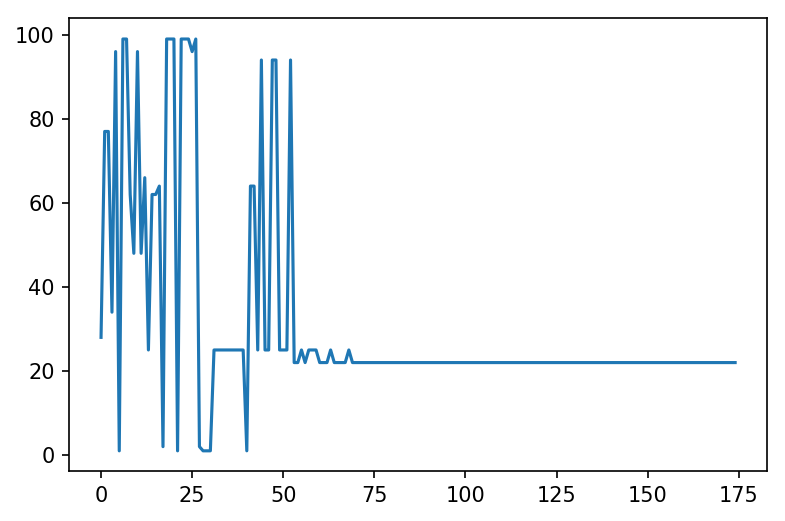

In [298]:
plt.figure(dpi=150)
plt.plot(dtrajs0[807][::10])

In [302]:
len(dtrajs0[807])

1750

In [316]:
# not getting anything useful here - next step here I think should be use all those 1k distances I drew
# doing it on lilac